#Outlier Handling Using IQR Method

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r"C:\Users\matha\Downloads\placement (1).csv")
df.sample(5)

cgpa  placement_exam_marks  placed
955  7.20                  26.0       1
773  8.06                  79.0       0
162  7.80                  90.0       0
43   7.85                  63.0       0
214  7.42                  60.0       1

In [ ]:
df.shape

(1000, 3)

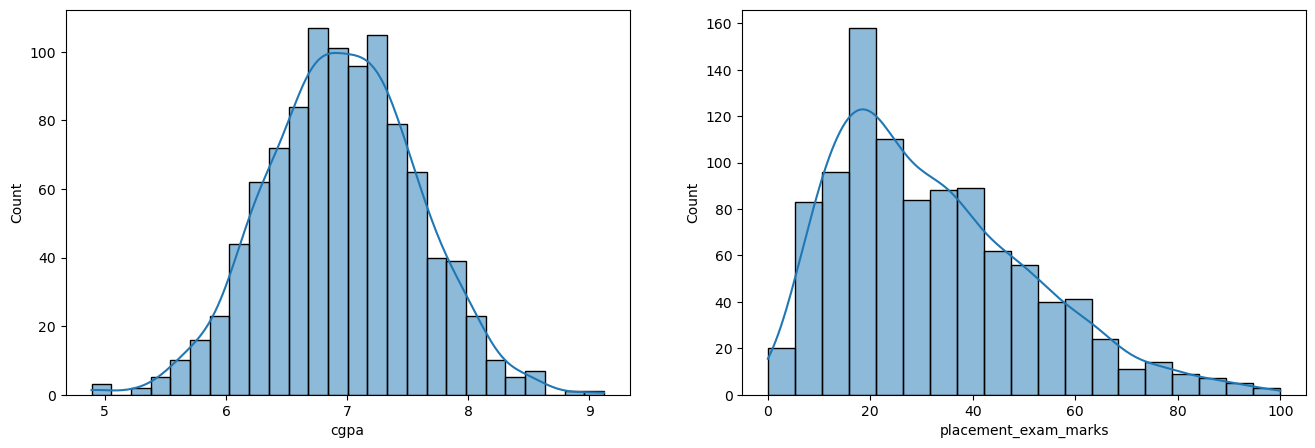

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

In [ ]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [ ]:
df['cgpa'].skew()

-0.014529938929314918

In [ ]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

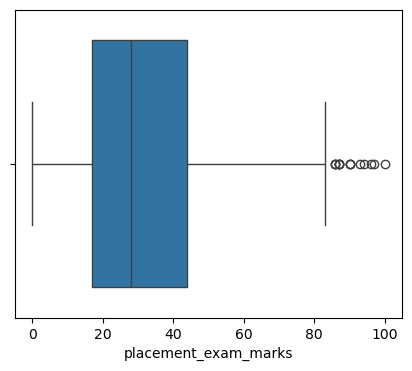

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df['placement_exam_marks'])

In [ ]:
pcnt25=df['placement_exam_marks'].quantile(0.25)
pcnt75=df['placement_exam_marks'].quantile(0.75)

In [ ]:
pcnt75

44.0

In [ ]:
pcnt25

17.0

In [ ]:
iqr=pcnt75-pcnt25
iqr

27.0

In [ ]:
upper_limit=pcnt75+1.5*iqr
lower_limit=pcnt25-1.5*iqr

In [ ]:
print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)

Upper limit:  84.5
Lower limit:  -23.5


# Finding Outliers

In [ ]:
new_df=df[df['placement_exam_marks']>upper_limit]
new_df

cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0

In [ ]:
new_df.shape

(15, 3)

# Trimming

In [ ]:
new_df=df[df['placement_exam_marks']<upper_limit]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[985 rows x 3 columns]

In [ ]:
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

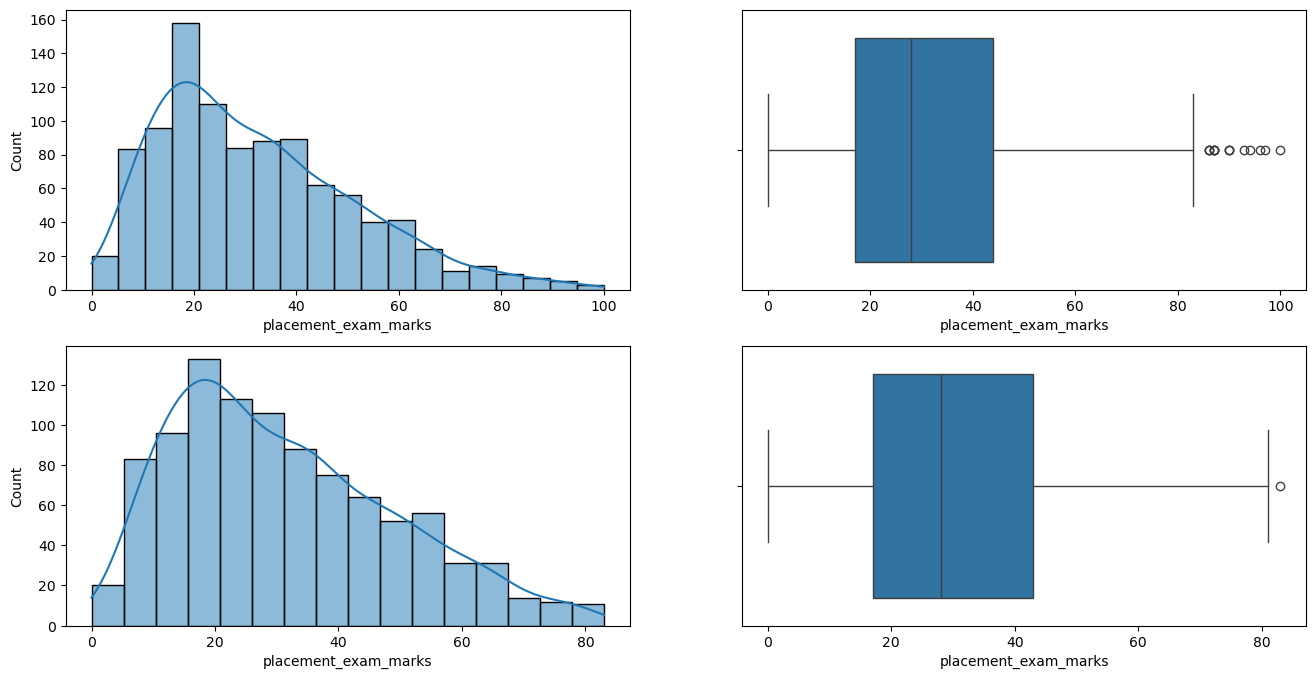

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(221)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(223)
sns.histplot(new_df['placement_exam_marks'],kde=True)

plt.subplot(224)
sns.boxplot(x=new_df['placement_exam_marks'])

# Capping

In [ ]:
new_df_cap=df.copy()

new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [ ]:
new_df_cap.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

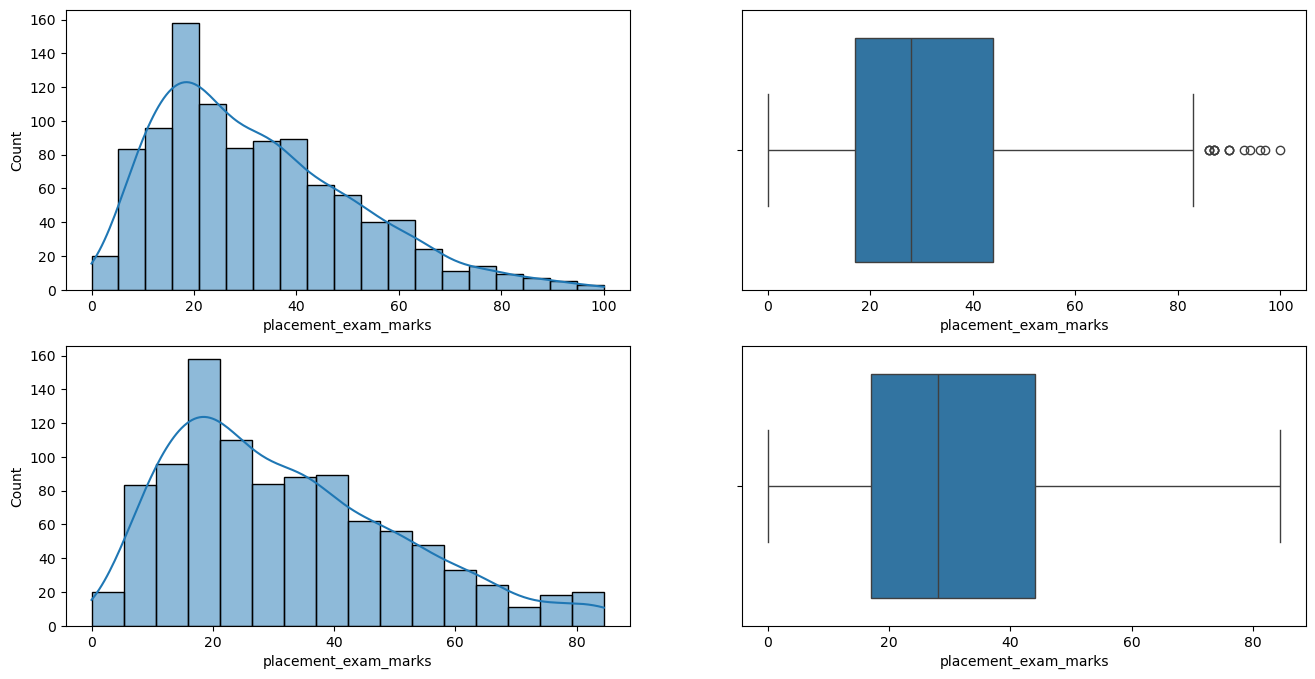

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])